In [31]:
import os
import numpy as np
import pandas as pd

# Data Preprocessing 

In [32]:
df = pd.read_csv(os.path.join('data','calories', 'Total_Daily_Calories.csv'))
df.head(3)

,Person,Age,Gender,Weight,Height,Activity Level,Systolic BP,Diastolic BP,Cholesterol Level,Blood Sugar,Hypertension,Low Pressure,Diabetes,Heart Condition,BMR,Total Daily Calories
0,T,59,Male,95.698543,162.002710,Very Active,95,80,247.288159,105.027564,False,False,False,True,1679.502366,1774.478286
1,X,78,Male,95.300594,186.485409,Moderate,112,63,160.221120,129.622977,False,True,False,False,1733.539746,1338.725045
2,Y,42,Male,89.201163,189.557492,Sedentary,129,78,236.642406,166.855089,True,False,False,True,1871.745957,5251.430617


In [33]:
df.drop("Person",inplace=True,axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Age                   1000 non-null   int64  
 1   Gender                1000 non-null   object 
 2   Weight                1000 non-null   float64
 3   Height                1000 non-null   float64
 4   Activity Level        1000 non-null   object 
 5   Systolic BP           1000 non-null   int64  
 6   Diastolic BP          1000 non-null   int64  
 7   Cholesterol Level     1000 non-null   float64
 8   Blood Sugar           1000 non-null   float64
 9   Hypertension          1000 non-null   bool   
 10  Low Pressure          1000 non-null   bool   
 11  Diabetes              1000 non-null   bool   
 12  Heart Condition       1000 non-null   bool   
 13  BMR                   1000 non-null   float64
 14  Total Daily Calories  1000 non-null   float64
dtypes: bool(4), float64(6)

In [34]:
df["Activity Level"].unique()

array(['Very Active', 'Moderate', 'Sedentary', 'Light', 'Active'],
      dtype=object)

In [35]:
from sklearn.preprocessing import LabelEncoder

# Create an instance of LabelEncoder
encoder = LabelEncoder()
# Fit and transform the data
df['Gender'] = encoder.fit_transform(df['Gender'])
df['Diabetes'] = encoder.fit_transform(df['Diabetes'])
df['Low Pressure'] = encoder.fit_transform(df['Low Pressure'])
df['Hypertension'] = encoder.fit_transform(df['Hypertension'])
df['Heart Condition'] = encoder.fit_transform(df['Heart Condition'])

# Ordinal encoding
activity_levels = {'Very Active': 4, 'Active': 3, 'Moderate': 2, 'Light': 1, 'Sedentary': 0}
# Encoding the data
df["Activity Level"] = [activity_levels[level] for level in df["Activity Level"]]

df.head(12)

,Age,Gender,Weight,Height,Activity Level,Systolic BP,Diastolic BP,Cholesterol Level,Blood Sugar,Hypertension,Low Pressure,Diabetes,Heart Condition,BMR,Total Daily Calories
0,59,1,95.698543,162.002710,4,95,80,247.288159,105.027564,0,0,0,1,1679.502366,1774.478286
1,78,1,95.300594,186.485409,2,112,63,160.221120,129.622977,0,1,0,0,1733.539746,1338.725045
2,42,1,89.201163,189.557492,0,129,78,236.642406,166.855089,1,0,0,1,1871.745957,5251.430617
3,78,1,73.470440,160.670429,4,163,65,176.480249,183.729538,1,0,0,0,1353.894578,3127.364277
4,76,1,95.194342,188.238706,4,95,55,199.236508,103.810610,0,1,1,1,1753.435339,1179.391572
5,50,1,87.802662,189.780281,2,145,109,251.689715,135.890941,1,0,0,1,1819.153376,7018.974663
6,46,1,93.772934,185.375870,1,144,62,268.108874,150.508711,1,0,1,1,1871.328529,3811.791441
7,33,1,55.122374,184.400910,0,82,88,188.798108,116.779453,0,0,1,0,1543.729433,1583.596797
8,68,1,97.139075,176.268032,1,107,84,207.286143,168.395687,1,1,0,0,1738.065946,3151.904993
9,62,0,84.064154,155.518709,4,166,111,221.382894,171.478184,0,0,0,0,1341.633470,6589.514300


In [36]:
df = df.round()
df.head(3)

,Age,Gender,Weight,Height,Activity Level,Systolic BP,Diastolic BP,Cholesterol Level,Blood Sugar,Hypertension,Low Pressure,Diabetes,Heart Condition,BMR,Total Daily Calories
0,59,1,96.0,162.0,4,95,80,247.0,105.0,0,0,0,1,1680.0,1774.0
1,78,1,95.0,186.0,2,112,63,160.0,130.0,0,1,0,0,1734.0,1339.0
2,42,1,89.0,190.0,0,129,78,237.0,167.0,1,0,0,1,1872.0,5251.0


In [37]:
df.to_csv(os.path.join('data','calories', 'New_Total_Daily_Calories.csv'))

# Data visualization 

In [38]:

df = pd.read_csv(os.path.join('data','calories', 'New_Total_Daily_Calories.csv'))
df.head(3)

,Unnamed: 0,Age,Gender,Weight,Height,Activity Level,Systolic BP,Diastolic BP,Cholesterol Level,Blood Sugar,Hypertension,Low Pressure,Diabetes,Heart Condition,BMR,Total Daily Calories
0,0,59,1,96.0,162.0,4,95,80,247.0,105.0,0,0,0,1,1680.0,1774.0
1,1,78,1,95.0,186.0,2,112,63,160.0,130.0,0,1,0,0,1734.0,1339.0
2,2,42,1,89.0,190.0,0,129,78,237.0,167.0,1,0,0,1,1872.0,5251.0


In [39]:
df.drop(["Unnamed: 0"],inplace=True ,axis=1)
print("Sum duplicated = ",df.duplicated().sum())
df.describe().T

Sum duplicated =  0


,count,mean,std,min,25%,50%,75%,max
Age,1000.0,54.434,14.880897,30.0,42.00,54.0,68.00,80.0
Gender,1000.0,0.489,0.500129,0.0,0.00,0.0,1.00,1.0
Weight,1000.0,75.168,14.468141,50.0,62.75,75.0,88.00,100.0
Height,1000.0,170.433,11.775065,150.0,161.00,170.0,181.00,190.0
Activity Level,1000.0,1.998,1.438077,0.0,1.00,2.0,3.00,4.0
Systolic BP,1000.0,130.725,31.557999,60.0,106.00,131.0,154.00,200.0
Diastolic BP,1000.0,85.963,21.637463,40.0,69.00,86.0,103.25,130.0
Cholesterol Level,1000.0,196.615,37.569805,120.0,167.00,196.5,227.00,270.0
Blood Sugar,1000.0,147.409,40.543649,70.0,114.00,147.0,180.00,230.0
Hypertension,1000.0,0.518,0.499926,0.0,0.00,1.0,1.00,1.0


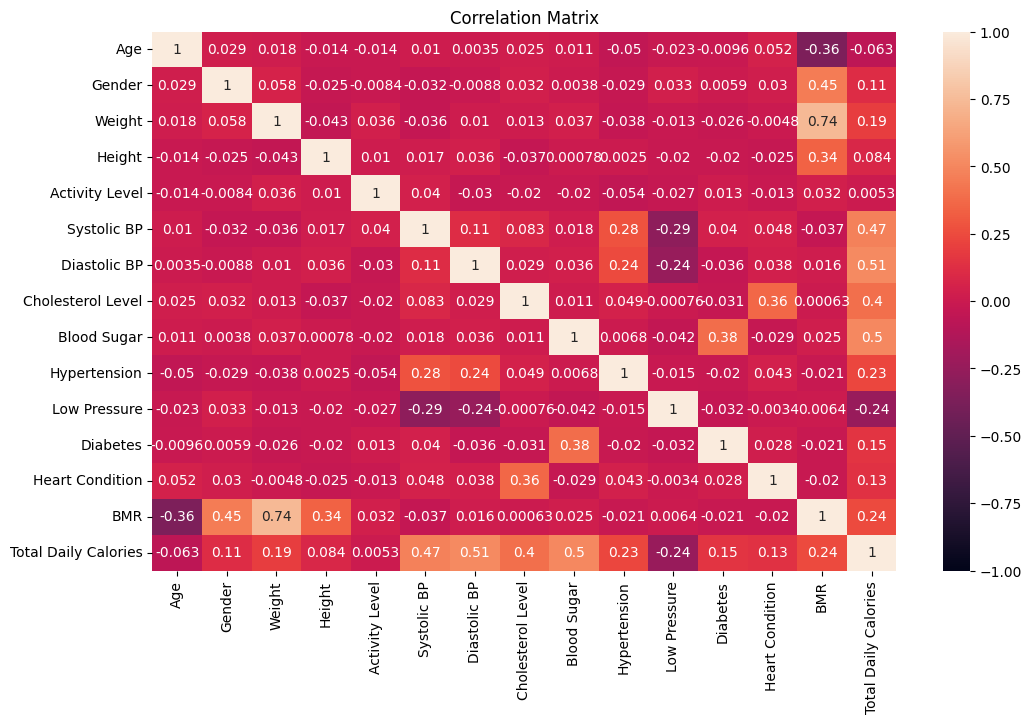

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(12, 7))
sns.heatmap(df.corr(), annot = True, vmin = -1, vmax = 1)
plt.title('Correlation Matrix')
plt.show()

In [41]:
df.drop(columns=["Low Pressure"],inplace=True,axis=1)
df = df.astype(int)
df.head(2)

,Age,Gender,Weight,Height,Activity Level,Systolic BP,Diastolic BP,Cholesterol Level,Blood Sugar,Hypertension,Diabetes,Heart Condition,BMR,Total Daily Calories
0,59,1,96,162,4,95,80,247,105,0,0,1,1680,1774
1,78,1,95,186,2,112,63,160,130,0,0,0,1734,1339


# Model ML

In [42]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import  r2_score
from sklearn.model_selection import train_test_split

x = df.drop('Total Daily Calories', axis = 1)
y = df['Total Daily Calories']
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2)

lr_model = LinearRegression()
lr_model.fit(x_train, y_train)
preds_train = lr_model.predict(x_train)
print("Train = ",r2_score(y_train, preds_train)*100)

preds_test = lr_model.predict(x_test)
print("Test = ",r2_score(y_test, preds_test)*100)

Train =  83.36858672572458
Test =  85.18806886051057


In [43]:
from sklearn.ensemble import RandomForestRegressor
reg_forest = RandomForestRegressor(random_state = 42, criterion = 'squared_error')
reg_forest.fit(x_train, y_train) # fit the model

preds_forest_test = reg_forest.predict(x_train)   
print("Train = ",r2_score(y_train, preds_forest_test)*100)
preds_forest_test = reg_forest.predict(x_test)   
print("Test = ",r2_score(y_test, preds_forest_test)*100)

Train =  97.80082290971444
Test =  87.20670003158276


In [44]:
import joblib
# Save the trained model

joblib.dump(reg_forest, os.path.join('models', 'calories_model.pkl'))

['models\\calories_model.pkl']

In [45]:
import joblib
# load the saved model from a file
loaded_model = joblib.load(os.path.join('models', 'calories_model.pkl'))

# use the loaded model to make predictions
preds_loaded_test = loaded_model.predict([[78	,1	,95	,186	,2	,112	,63	,160	,130	,0	,0	,0	,1734]])

print("Total Daily Calories = ",preds_loaded_test[0].item())

Total Daily Calories =  1366.09


c:\Users\am505\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
